# Super market sales: -

In [126]:
# all libraries.

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

In [127]:
# importing data.
super_market = pd.read_csv("supermarket_sales (1).csv")

In [128]:
super_market.head()         # checking head.

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [129]:
super_market.tail()         # checking tail.

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


## part 1:

### 1. Complete all the basic exploratory steps.

In [130]:
# dropping unnecessary columns.
super_market = super_market.drop(["Invoice ID","cogs","gross margin percentage"],axis=1)

In [131]:
super_market.nunique()       # checking uniqness of the columns.

Branch             3
City               3
Customer type      2
Gender             2
Product line       6
Unit price       943
Quantity          10
Tax 5%           990
Total            990
Date              89
Time             506
Payment            3
gross income     990
Rating            61
dtype: int64

In [132]:
super_market = super_market.drop_duplicates()    # dropping duplicated values in the rows.

In [133]:
super_market.info()      # here checking information and null values of the columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Date           1000 non-null   object 
 10  Time           1000 non-null   object 
 11  Payment        1000 non-null   object 
 12  gross income   1000 non-null   float64
 13  Rating         1000 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 117.2+ KB


In [134]:
super_market.isnull().sum()       # here checking total no. of null values.

Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
gross income     0
Rating           0
dtype: int64

In [135]:
super_market.isnull()            # here checking null values in visual form or True or False.

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [136]:
super_market.describe(include='all')     # summary of all columns.

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,gross income,Rating
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.00000
unique,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN
top,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,14:42,Ewallet,NaN,NaN
freq,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,22.445250,8.50000


In [137]:
# changing columns space into "_"(hiphen) or renaming the columns.
super_market = super_market.rename(columns={"Customer type":"Customer_type","Product line":"Product_line","Unit price":"Unit_price","gross income":"gross_income"})

<AxesSubplot:>

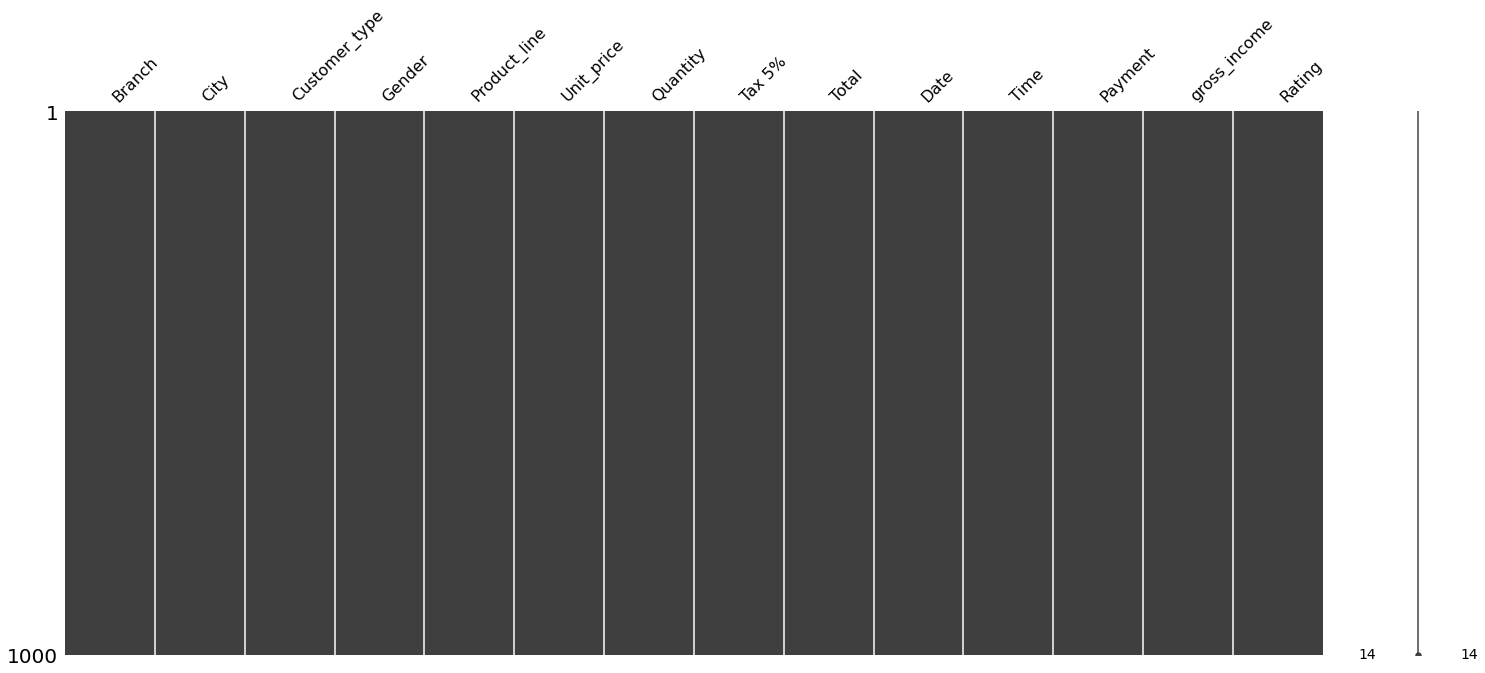

In [138]:
msno.matrix(super_market)     # checking pattern of columns.

## part 2:

### 2. Is your supermarket more popular with males or females? 

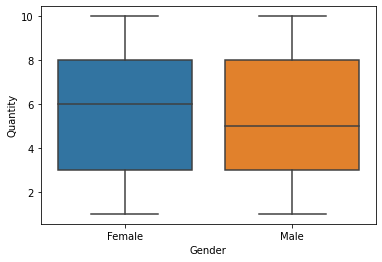

' according to my analysis the popularity of supermarket in males and females are high. both are eually interested in this. \n  here i have seen the median is differ in between male and female. female median is higher than male'

In [139]:
# checking popularity between male and female.
sns.boxplot(x="Gender",y="Quantity", data=super_market)
plt.show()

""" according to my analysis the popularity of supermarket in males and females are high. both are eually interested in this. 
  here i have seen the median is differ in between male and female. female median is higher than male"""

### 2. What does the customer rating look like and can you also comment on its skewness? 

'In this hist plot i am checking skewness with using mean and median. Some time the rating increasing and decreasing. But if I look mean and median then both the line is crossing but slightley difference in it. It means the average rating is " 7 probabely ". This is the rating of 2019 '

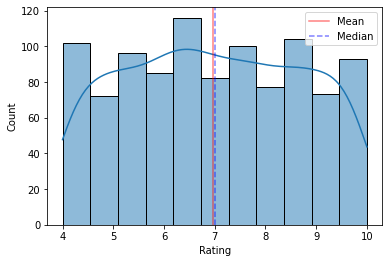

In [140]:
sns.histplot(data=super_market["Rating"], kde=True)
plt.axvline(x=super_market.Rating.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=super_market.Rating.median(),color='blue',alpha=0.5,ls='--',label='Median')
plt.legend()
"""In this hist plot i am checking skewness with using mean and median. Some time the rating increasing and decreasing. But if I look mean and median then both the line is crossing but slightley difference in it. It means the average rating is " 7 probabely ". This is the rating of 2019 """

### 3. What can you say about the aggregate sales across the branches? 

'In this I have seen Branch-"C" quantity sales is bit high than the others. '

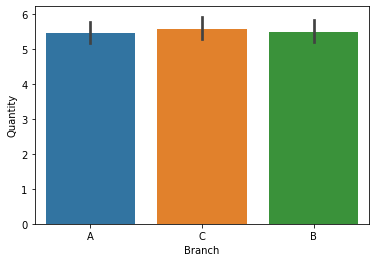

In [141]:
# here i am checking quantity sales of every branch.
sns.barplot(x="Branch",y="Quantity",data=super_market)

"""In this I have seen Branch-"C" quantity sales is bit high than the others. """

### 4. Which is the most popular payment method used by customers?

<AxesSubplot:xlabel='Payment', ylabel='Total'>

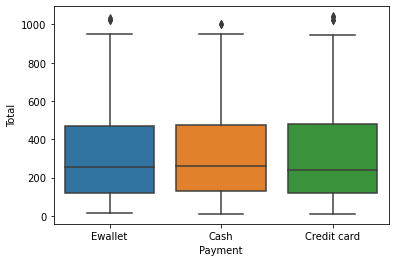

In [142]:
# in this analysis i am taking Total amount and Payment method.

# in this i have seen whether it male or female. Everyone is using "Ewallet","Cash payment","Credit card". 
# But the thing is Credit card have the outlier which is higher than the other payment method. 
# So, most of the people is interested in Credit card.

sns.boxplot(x="Payment",y="Total",data=super_market)


## part 3:

### 1.Does gross income affect customer ratings? 

<AxesSubplot:xlabel='Rating', ylabel='gross_income'>

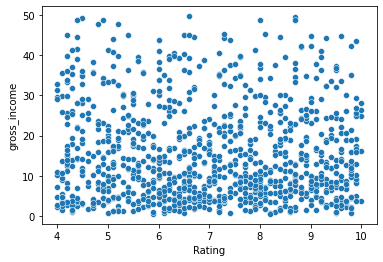

In [143]:
# here i am using scatter plot to compare ratings with gross income.
# according to my understanding, as income increasing then it is affecting rating.
# gross income on 10 and 20 have higher ratings. After that when income increase then rating decreasing.

# i think those people have high gross income then they are expecting something much better in it.


sns.scatterplot(x="Rating",y="gross_income", data=super_market)

### 2. Which is the most profitable branch? 

<AxesSubplot:xlabel='Branch', ylabel='Total'>

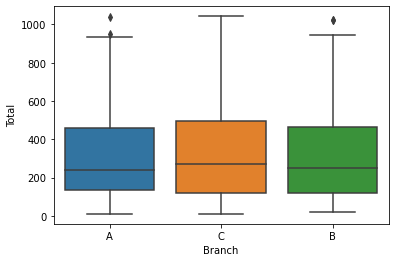

In [144]:
# here i am checking profitable branch.
# according to my analysis, Branch "C" is higher profitable branch than the other.
# Because here is total amount of sales is higher than the other.

sns.boxplot(x="Branch",y="Total",data=super_market)

<AxesSubplot:xlabel='Unit_price', ylabel='Total'>

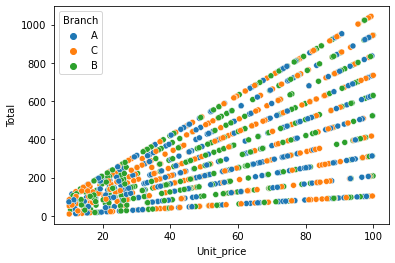

In [145]:
# I am trying this question in multi-variate analysis
# but seems like messy. so, this plot is not usefull here.

sns.scatterplot(x="Unit_price",y="Total",hue="Branch",data=super_market)

### 3. How is the relationship between Gender and Gross income? 

<AxesSubplot:xlabel='Gender', ylabel='gross_income'>

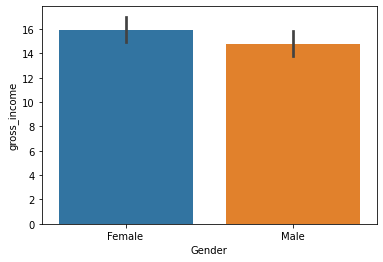

In [146]:
# here i am checking the relationship of gender with gross income.
# here female have higher gross income than the male.
# so, we can say female purchasing power is higher than males.

sns.barplot(x="Gender",y="gross_income",data=super_market)

### 4. Can you see any time trend in gross income? 

In [147]:
# this is the date functionality.

super_market['Date'] = pd.to_datetime(super_market['Date'], errors='coerce')

In [148]:
# here i am spliting date into YY- MM -DD.

super_market['Year'] = super_market['Date'].dt.year
super_market['Month'] = super_market['Date'].dt.month
super_market['Day'] = super_market['Date'].dt.day

<AxesSubplot:xlabel='Month', ylabel='gross_income'>

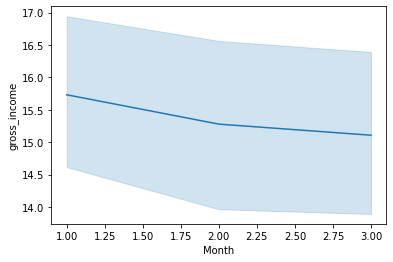

In [149]:
# here i am checking trend line of gross income with months.
# in this analysis, as month is increasing gross income is decreasing.

# with this we can understand if people gross income is decreasing as months increasing then it will affect the purchasing power of people.

sns.lineplot(x="Month",y="gross_income",data=super_market)



### 5. Which product line helps you generate the most income? 

<AxesSubplot:xlabel='Product_line', ylabel='Total'>

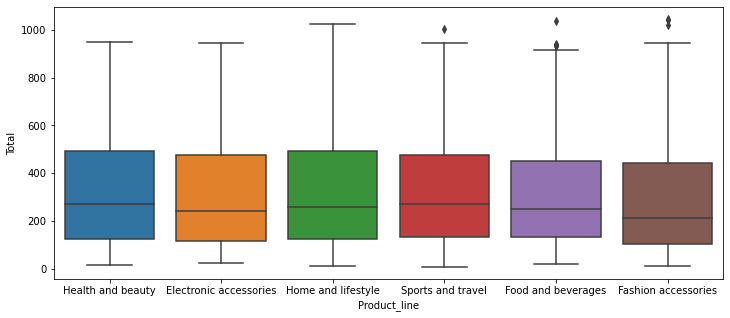

In [150]:
# here i am checking most the product which is generating most of the income.
# Home and lifestyle is generating higher income than others. Because this product demand is very high than other things.

plt.figure(figsize=(12,5))
sns.boxplot(x="Product_line",y="Total",data=super_market)

### 6. What is the spending pattern of both males and females, meaning in which category do they spend more? 

<AxesSubplot:xlabel='Product_line', ylabel='Total'>

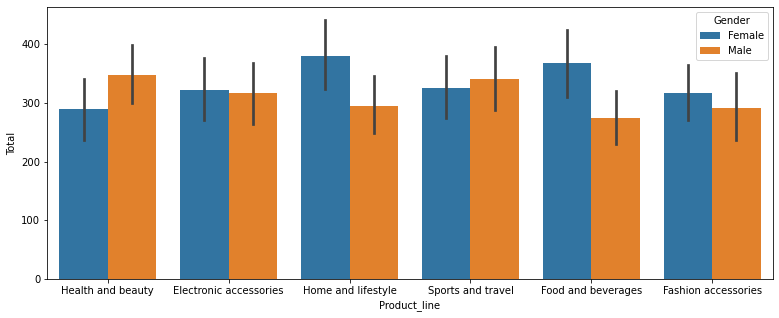

In [151]:
# here i am checking gender with product line with total sales.
# here in this analysis, i have seen in some product female is demanding more and in some case male is demanding more.
# so, it difficult to judge a particular category.
# if i see this then FEMALE is demanding more in "HOME and LIFESTYLE".But male demand is less in this
# if i took another in MALE category then they are demanding more in "HEALTH and BEAUTY". But female demand is less in this.



plt.figure(figsize=(13,5))
sns.barplot(x="Product_line",y="Total",hue="Gender",data=super_market)

### 7. How many products are bought by customers? 

<AxesSubplot:xlabel='Product_line', ylabel='Quantity'>

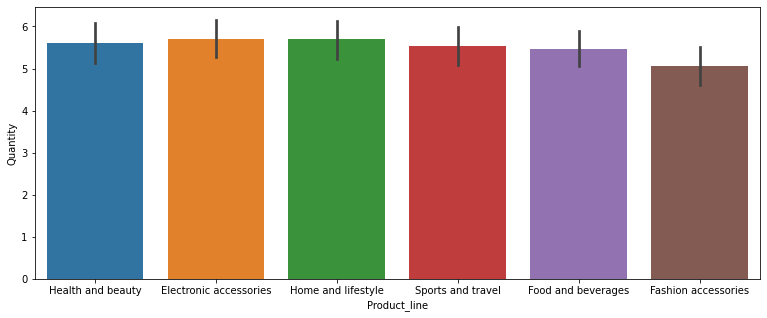

In [152]:
# here i am comparing product line with quantity.
# electronics accessories have bit demand high.


plt.figure(figsize=(13,5))
sns.barplot(x="Product_line",y="Quantity",data=super_market)

### 8. Which day of the week has maximum sales? 

In [153]:
# here i have made a week column which name is week_number.
super_market['week_number'] = super_market['Date'].dt.strftime('%U')

<AxesSubplot:xlabel='week_number', ylabel='Total'>

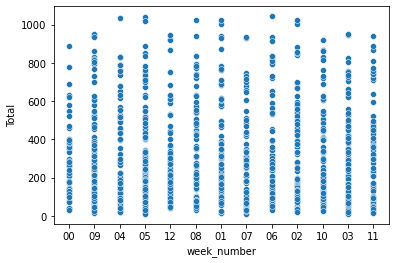

In [154]:
# here i am checking highest sales.
# the highest sales happen in 6th of week.


sns.scatterplot(x="week_number",y="Total",data=super_market)

### 9. Which product line should your supermarket focus on? 

<AxesSubplot:xlabel='Product_line', ylabel='Month'>

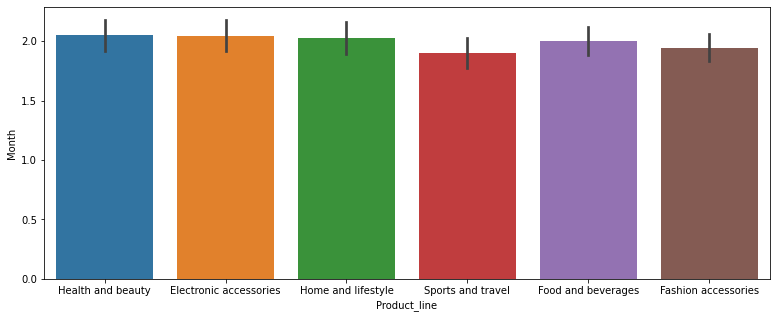

In [163]:
# here i am identifing which product demand is less.
# according to analysis as month is increasing the sports and travel requirement of the people is decreasing.
# so, we need to focus on it.


plt.figure(figsize=(13,5))
sns.barplot(x="Product_line",y="Month",data=super_market)

### 10. Which city should be chosen for expansion and what products should be focussed on?

In [164]:
super_market.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

<AxesSubplot:xlabel='City', ylabel='Quantity'>

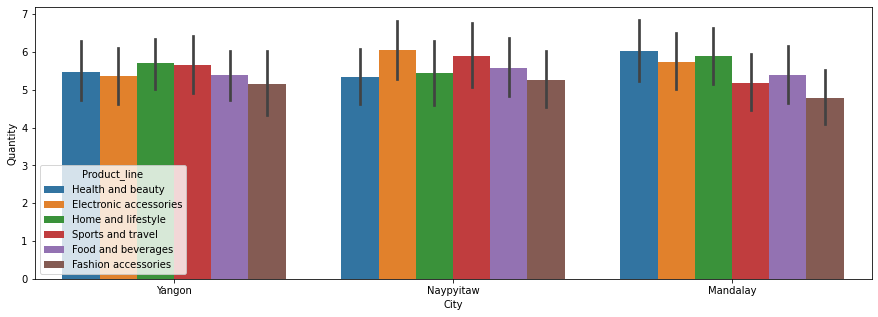

In [169]:
# here i am chosing "Mandalay" city for the product expansion.
# here "Fashion accessories" demand is less. so, we can do research on it why there is less demand of fashion accessories as compare to other city.
# another product line i am taking here which is "sports and travel". so, we can do more focus on it.

plt.figure(figsize=(15,5))
sns.barplot(x="City",y="Quantity",hue="Product_line",data=super_market)